In [1]:
import sys  
sys.path.append("../")

In [2]:
import modules as nn
from initializers import Xavier
from losses import LossMSE as MSE
from activations import *
from utils import *

In [3]:
import torch
torch.set_grad_enabled(False)

In [4]:
import matplotlib.pyplot as plt

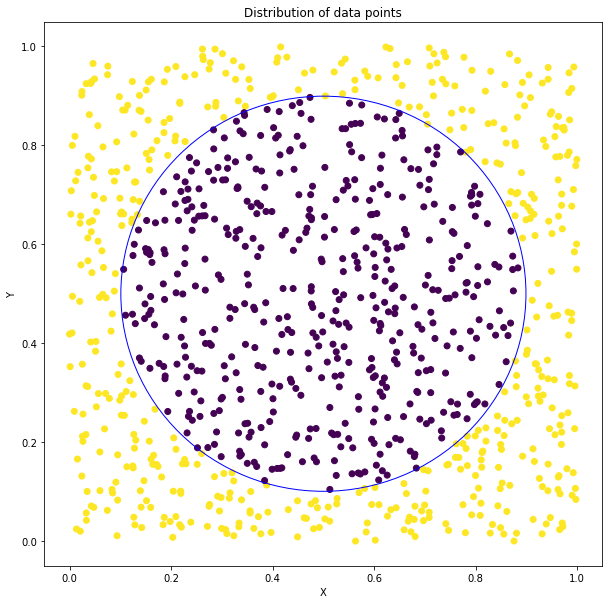

In [5]:
data, labels = get_data(1000)
#Plot the distribution of the generated data, to see how it looks like
fig = plt.figure(figsize=(10,10))
ax = fig.gca()
plt.scatter(data[:,0].tolist(), data[:,1].tolist(), c = labels.tolist())
ax.add_patch(plt.Circle((0.5, 0.5), 1 / (math.sqrt(2*math.pi)), color='b', fill=False))
plt.savefig('disk_data.png')
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Distribution of data points")
plt.show()

In [6]:
labels.size()

torch.Size([1000])

In [7]:
INPUT_UNITS = 2
HIDDEN_LAYERS = 3
HIDDEN_UNITS = 25
OUTPUT_UNITS = 2

In [8]:
# The model
model = nn.Sequential(nn.Linear(INPUT_UNITS, HIDDEN_UNITS),
                ReLU(),
                nn.Linear(HIDDEN_UNITS, HIDDEN_UNITS),
                ReLU(),
                nn.Linear(HIDDEN_UNITS, HIDDEN_UNITS),
                ReLU(),
                nn.Linear(HIDDEN_UNITS, OUTPUT_UNITS),
                Sigmoid()
                )
                

In [9]:
print(model)

layer = 1
w:torch.Size([25, 2])
b:torch.Size([1, 25])
--------------------------------------------------
layer = 2
w:torch.Size([25, 25])
b:torch.Size([1, 25])
--------------------------------------------------
layer = 3
w:torch.Size([25, 25])
b:torch.Size([1, 25])
--------------------------------------------------
layer = 4
w:torch.Size([2, 25])
b:torch.Size([1, 2])
--------------------------------------------------


In [10]:
#model.param()

In [11]:
# Generate the data
X_train, y_train = get_data(1000)
X_test, y_test = get_data(1000)

In [12]:
# Train the model
lrs = [0.01, 0.015, 0.04]
stats = [] 
for lr in lrs:
    print(f"Traininng model with lr={lr}:")
    # The model
    model = nn.Sequential(nn.Linear(INPUT_UNITS, HIDDEN_UNITS),
                          LeakyReLU(),
                          nn.Linear(HIDDEN_UNITS, HIDDEN_UNITS),
                          LeakyReLU(),
                          nn.Linear(HIDDEN_UNITS, HIDDEN_UNITS),
                          LeakyReLU(),
                          nn.Linear(HIDDEN_UNITS, OUTPUT_UNITS),
                          Sigmoid()
                         )
                            
    _, train_loss, train_acc, test_loss, test_acc = train_test_model(model,X_train,y_train,X_test,y_test,lr=lr)
    stats.append([train_loss, train_acc, test_loss, test_acc])
    print("-"*120)

Traininng model with lr=0.01:
Epoch 1: train loss=0.2940, train acccuracy=50.40% | test loss=0.2550, test acccuracy=51.00%
Epoch 5: train loss=0.2387, train acccuracy=50.40% | test loss=0.2452, test acccuracy=51.00%
Epoch 10: train loss=0.1080, train acccuracy=50.40% | test loss=0.0943, test acccuracy=51.00%
Epoch 15: train loss=0.0549, train acccuracy=59.20% | test loss=0.0581, test acccuracy=65.00%
Epoch 20: train loss=0.0456, train acccuracy=68.90% | test loss=0.0577, test acccuracy=75.70%
Epoch 25: train loss=0.0418, train acccuracy=73.40% | test loss=0.0455, test acccuracy=77.90%
Epoch 30: train loss=0.0389, train acccuracy=77.20% | test loss=0.0338, test acccuracy=79.40%
Epoch 35: train loss=0.0354, train acccuracy=78.80% | test loss=0.0278, test acccuracy=79.90%
Epoch 40: train loss=0.0360, train acccuracy=81.00% | test loss=0.0395, test acccuracy=80.50%
Epoch 45: train loss=0.0328, train acccuracy=81.70% | test loss=0.0349, test acccuracy=83.70%
Epoch 50: train loss=0.0315, tra

----

## Torch:

In [13]:
torch.set_grad_enabled(True)

In [14]:
# Train the model
torch_stats = []
for lr in lrs:
    print(f"Traininng PyTorch model with lr={lr}:")
    # The model
    torch_model = torch.nn.Sequential(torch.nn.Linear(INPUT_UNITS, HIDDEN_UNITS),
                            torch.nn.LeakyReLU(),
                            torch.nn.Linear(HIDDEN_UNITS, HIDDEN_UNITS),
                            torch.nn.LeakyReLU(),
                            torch.nn.Linear(HIDDEN_UNITS, HIDDEN_UNITS),
                            torch.nn.LeakyReLU(),
                            torch.nn.Linear(HIDDEN_UNITS, OUTPUT_UNITS),
                            torch.nn.Sigmoid()
                            )
    _, train_loss, train_acc, test_loss, test_acc = torch_train_test_model(torch_model, X_train, y_train, X_test, y_test)
    torch_stats.append([train_loss, train_acc, test_loss, test_acc])
    print("-"*120)

Traininng PyTorch model with lr=0.01:
Epoch 1: train loss=0.1935, train acccuracy=51.40% | test loss=0.1493, test acccuracy=51.00%
Epoch 5: train loss=0.1262, train acccuracy=50.40% | test loss=0.1254, test acccuracy=51.00%
Epoch 10: train loss=0.1253, train acccuracy=50.40% | test loss=0.1248, test acccuracy=51.00%
Epoch 15: train loss=0.1249, train acccuracy=50.40% | test loss=0.1243, test acccuracy=51.00%
Epoch 20: train loss=0.1241, train acccuracy=50.40% | test loss=0.1235, test acccuracy=51.00%
Epoch 25: train loss=0.1221, train acccuracy=50.40% | test loss=0.1214, test acccuracy=51.00%
Epoch 30: train loss=0.1157, train acccuracy=50.40% | test loss=0.1147, test acccuracy=51.00%
Epoch 35: train loss=0.0888, train acccuracy=50.40% | test loss=0.0855, test acccuracy=51.00%
Epoch 40: train loss=0.0460, train acccuracy=50.40% | test loss=0.0437, test acccuracy=51.00%
Epoch 45: train loss=0.0270, train acccuracy=53.40% | test loss=0.0284, test acccuracy=54.20%
Epoch 50: train loss=0.0

## Visualization:

In [15]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
stats_np = np.array(stats)
stats_np.shape

(3, 4, 150)

In [17]:
torch_stats_np = np.array(torch_stats)
torch_stats_np.shape #(lr, [train_loss, train_acc, test_loss, test_acc], epochs)

(3, 4, 150)

In [18]:
lrs

[0.01, 0.015, 0.04]

In [39]:
def plots_results(results,torch_results,lrs):
    
    lrs_colors = ['b', 'g', 'm']
    
    fig, ((ax1, ax2), (ax3, ax4))  = plt.subplots(2, 2,figsize= (20,18))
    
    ax1.sharey(ax2)
    ax3.sharey(ax4)
    
    for ind,lr in enumerate(lrs):
        
        ax1.plot(results[ind][0], color = lrs_colors[ind], label = f'training loss with lr={lrs[ind]}')
        ax3.plot(results[ind][1], color = lrs_colors[ind], label = f'training accuracy  with lr={lrs[ind]}')
        
        ax2.plot(torch_results[ind][0], color = lrs_colors[ind], label = f'training loss with lr={lrs[ind]}')
        ax4.plot(torch_results[ind][1], color = lrs_colors[ind], label = f'training accuracy  with lr={lrs[ind]}')
        
        
    ax1.set_title('Training Mean Square Error ',{'fontsize':18})
    ax1.set_xlabel("Epochs",{'fontsize':18})
    ax1.set_ylabel("MSE",{'fontsize':18})
    
    ax2.set_title('(PyTorch) Training Mean Square Error ',{'fontsize':18})
    ax2.set_xlabel("Epochs",{'fontsize':18})
    ax2.set_ylabel("MSE",{'fontsize':18})

    ax3.set_title('Training accuracy ',{'fontsize':18})
    ax3.set_xlabel("Epochs",{'fontsize':18})
    ax3.set_ylabel("Accuracy",{'fontsize':18})

    ax4.set_title('(PyTorch) Training accuracy ',{'fontsize':18})
    ax4.set_xlabel("Epochs",{'fontsize':18})
    ax4.set_ylabel("Accuracy",{'fontsize':18})
    
    ax1.legend(loc = 'upper right',fontsize= 'large')
    ax2.legend(loc = 'upper right',fontsize= 'large')
    ax3.legend(loc = 'upper left',fontsize= 'large')
    ax4.legend(loc = 'upper left',fontsize= 'large')
    plt.tight_layout()
    plt.savefig("results.png")
    plt.show()

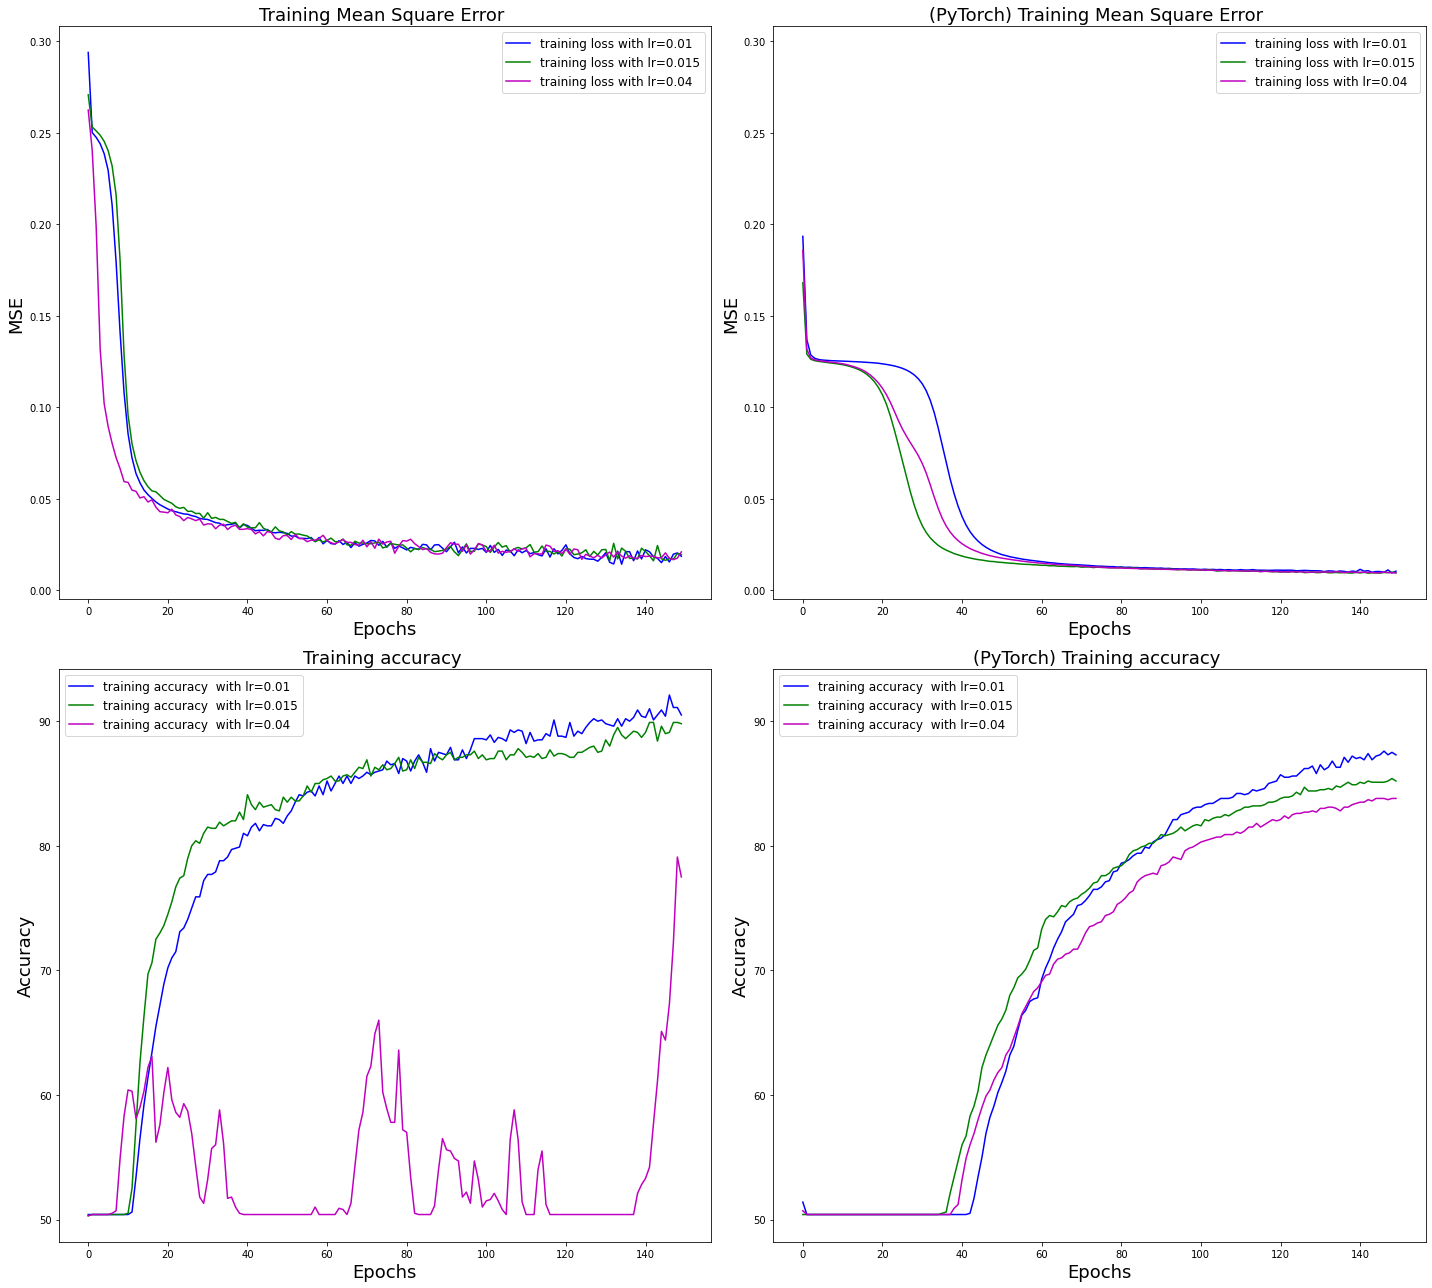

In [40]:
plots_results(stats_np, torch_stats_np,lrs)